In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
from sklearn.naive_bayes import GaussianNB

file_path = 'усложнённый World Skills working DataSet.xlsx'

#data = pd.read_excel(file_path, nrows=5000)
data = pd.read_excel(file_path)

data.shape

(18517, 20)

In [3]:
#понимаем, что все колонки кроме первой - пустые. Первая колонка содержит значения для остальных
pd.set_option('display.max_columns', 111)
data.describe()

,justification,name,unit,total_amount,price,salvo_per_unit_of_everything,justification_,total,salvo_per_unit_of_everything_,_justification_,total_,k_t,class,unit_kilogram,general_,titul_number,number_rsl,number_slot,enub_cd_number
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Получаем нормальный датасет на основании исходного
new_data = data['number_PP'].str.split(', ',expand=True)
new_data.rename(columns={0:'number_PP', 1: 'justification', 2: 'name', 3: 'unit', 4: 'total_amount',
       5: 'price', 6: 'salvo_per_unit_of_everything', 7: 'justification_', 8: 'total',
       9: 'salvo_per_unit_of_everything_', 10: '_justification_', 11: 'total_',
       12: 'k_t', 13: 'class', 14: 'unit_kilogram', 15: 'general_', 16:'titul_number',
       17: 'number_rsl', 18: 'number_slot', 19: 'enub_cd_number'}, inplace=True)
new_data

,number_PP,justification,name,unit,total_amount,price,salvo_per_unit_of_everything,justification_,total,salvo_per_unit_of_everything_,_justification_,total_,k_t,class,unit_kilogram,general_,titul_number,number_rsl,number_slot,enub_cd_number,20,21,22,23,24,25
0,62,101-0324,™¶А№ЅѕЅІпАґГј¶ЖіАё··\tоІ®¶јЅЇї®¶»К·,м3,"23366,963","6,41",,,"149782,24",11233668,,,,Нет,,,,100,п,02262016-02-100-СМ-5754-0 демонтаж жб конструкций,лот 1,0067.2017-03-301-КЖ1.СО-0001-0,None,None,None,None
1,63,101-0797,ћѕЅ°Ѕ№ЅёЇоІјїНЖі№®Б®ј®Оо±о»јБёЇГыоі¶ЇєґАїј»оъ...,т,,"3500,7",,,,0,,,,,,,,100,п,02262016-02-100-СМ-5754-0 демонтаж жб конструкций,лот 1,0067.2017-03-304-КЖ.СО-0001,None,None,None,None
2,64,101-0857,џБ°іїј·ІпЅЅІ№№ЇІЅЕјЙёоАоѕЙєі±¶і»Ѕ·пЅЅїКЅ№јёпћ...,м2,,"4,83",,,,0,,,,,,,,100,п,02262016-02-100-СМ-5754-0 демонтаж жб конструкций,лот 1,0067.2017-03-304-КЖ.СО-0001,None,None,None,None
3,65,101-0962,єЇµ№®пїЅ№·ІЅ№пґ·ѕЅ°Ѕ·пєЇѕ№¶пy•‰,т,,"10297,27",,,,0,,,,,,,,100,п,02262016-02-100-СМ-5754-0 демонтаж жб конструкций,лот 1,0067.2017-03-302-КЖ1.СО-0002-0,None,None,None,None
4,66,101-1517,¬№ґёБѕЅІКоі¶ЇєґАїј»ппє»о¬я,т,,"9078,49",,,,0,,,,,,,,100,п,02262016-02-100-СМ-5754-0 демонтаж жб конструкций,лот 1,0067.2017-03-302-КЖ1.СО-0002-0,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18512,130,ТСЦ-407-0013,–і»№Оої®АА·Аґ№Л»ЇНпєґГЇ»·µ·ѕЅ°Ї»јјёо¶®ІјБј±ё·,м3,"-1783,5","181,07",,полн,"-322938,35","-24220376,25",,,,,,,,700,п,02262016-02-700-СМ-5773-0 вертикальная планиро...,,0226.2016-02-ИОС7.3-605-ТХ.ОЛ10,None,None,None,None
18513,131,ТСЦ-407-0028,єґїЛоѕіАёЅДґєґ»Б»ЇНпцЕі»іјАпљпяюш,м3,"-85,25","375,37",,полн,"-32000,29","-2400021,75",,,,,,,,700,п,02262016-02-700-СМ-5773-0 вертикальная планиро...,,0090.2018-9000-ИОС7.3-201-ТХ.ОЛ9,None,None,None,None
18514,132,ТСЦ-408-0122,ћіАј№оѕѕ·ѕЅІјЙёоі№ОоААїј·Аґ№Л»КГ\tої®°јБоАѕґІј¶ё,м3,"-45,71","65,16",,полн,"-2978,46","-223384,5",,,,,,,,700,п,02262016-02-700-СМ-5773-0 вертикальная планиро...,,0090.2018-9000-ИОС7.3-202-ТХ.ОЛ55,None,None,None,None
18515,133,ТСЦ-414-0137,і»іј®п±ЇµЅ»јЙДоБѕЇ°пцАєґїЛч,кг,"125,4","139,16",,полн,"17450,66","1308799,5",,,,,,,,700,п,02262016-02-700-СМ-5773-0 вертикальная планиро...,,0090.2018-9000-ИОС7.3-203-ТХ.ОЛ6,None,None,None,None


In [5]:
#Если атрибут имеет значение "пустой строки", то заменяем её на NaN, что бы далее проанализировать пустые значения
new_data = new_data.replace('', np.nan, regex=True)

In [6]:
new_data.head()

,number_PP,justification,name,unit,total_amount,price,salvo_per_unit_of_everything,justification_,total,salvo_per_unit_of_everything_,_justification_,total_,k_t,class,unit_kilogram,general_,titul_number,number_rsl,number_slot,enub_cd_number,20,21,22,23,24,25
0,62,101-0324,™¶А№ЅѕЅІпАґГј¶ЖіАё··\tоІ®¶јЅЇї®¶»К·,м3,"23366,963","6,41",NaN,NaN,"149782,24",11233668,NaN,NaN,NaN,Нет,NaN,NaN,NaN,100,п,02262016-02-100-СМ-5754-0 демонтаж жб конструкций,лот 1,0067.2017-03-301-КЖ1.СО-0001-0,None,None,None,None
1,63,101-0797,ћѕЅ°Ѕ№ЅёЇоІјїНЖі№®Б®ј®Оо±о»јБёЇГыоі¶ЇєґАїј»оъ...,т,NaN,"3500,7",NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,п,02262016-02-100-СМ-5754-0 демонтаж жб конструкций,лот 1,0067.2017-03-304-КЖ.СО-0001,None,None,None,None
2,64,101-0857,џБ°іїј·ІпЅЅІ№№ЇІЅЕјЙёоАоѕЙєі±¶і»Ѕ·пЅЅїКЅ№јёпћ...,м2,NaN,"4,83",NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,п,02262016-02-100-СМ-5754-0 демонтаж жб конструкций,лот 1,0067.2017-03-304-КЖ.СО-0001,None,None,None,None
3,65,101-0962,єЇµ№®пїЅ№·ІЅ№пґ·ѕЅ°Ѕ·пєЇѕ№¶пy•‰,т,NaN,"10297,27",NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,п,02262016-02-100-СМ-5754-0 демонтаж жб конструкций,лот 1,0067.2017-03-302-КЖ1.СО-0002-0,None,None,None,None
4,66,101-1517,¬№ґёБѕЅІКоі¶ЇєґАїј»ппє»о¬я,т,NaN,"9078,49",NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,п,02262016-02-100-СМ-5754-0 демонтаж жб конструкций,лот 1,0067.2017-03-302-КЖ1.СО-0002-0,None,None,None,None


In [7]:
print(new_data['class'])

0        Нет
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
18512    NaN
18513    NaN
18514    NaN
18515    NaN
18516    NaN
Name: class, Length: 18517, dtype: object


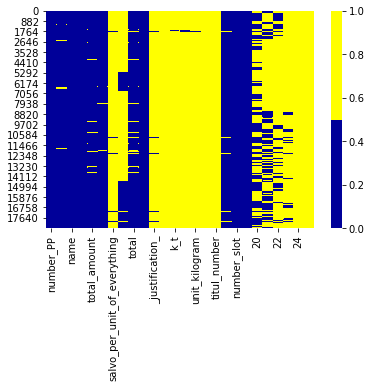

In [8]:
#Смотрим распределение пропущенных значений по колонкам
cols = new_data.columns
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(new_data[cols].isnull(), cmap=sns.color_palette(colours))

In [9]:
#Распределение пропущенных значений в столбцах
for col in new_data.columns:
    pct_missing = np.mean(new_data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

number_PP - 0.0%
justification - 2.0%
name - 0.0%
unit - 0.0%
total_amount - 4.0%
price - 1.0%
salvo_per_unit_of_everything - 99.0%
justification_ - 70.0%
total - 5.0%
salvo_per_unit_of_everything_ - 0.0%
_justification_ - 99.0%
total_ - 100.0%
k_t - 99.0%
class - 99.0%
unit_kilogram - 100.0%
general_ - 100.0%
titul_number - 100.0%
number_rsl - 1.0%
number_slot - 0.0%
enub_cd_number - 0.0%
20 - 54.0%
21 - 66.0%
22 - 81.0%
23 - 94.0%
24 - 100.0%
25 - 100.0%


In [10]:
#Выкидываем столбцы, в которых больше 10% пропущенных значений
new_data.drop([#Много пустых значений
                'salvo_per_unit_of_everything', 'justification_', '_justification_',
                'total_', 'k_t', 'class', 'unit_kilogram', 'general_', 'titul_number',
                20, 21, 22, 23, 24, 24, 25
               ], inplace=True, axis=1)

In [11]:
#Заменяем пустые значения на самые часто встречаемые в своём атрибуте
data_describe = new_data.describe(include=[object])
for c in new_data:
    new_data[c] = new_data[c].fillna(data_describe[c]['top'])

In [12]:
#Проверяем,что бы в дата сете больше небыло бы пустых значений не осталось
for col in new_data.columns:
    pct_missing = np.mean(new_data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

number_PP - 0.0%
justification - 0.0%
name - 0.0%
unit - 0.0%
total_amount - 0.0%
price - 0.0%
total - 0.0%
salvo_per_unit_of_everything_ - 0.0%
number_rsl - 0.0%
number_slot - 0.0%
enub_cd_number - 0.0%


In [13]:
new_data['total_amount'].describe()

count     18517
unique     7020
top           1
freq       1649
Name: total_amount, dtype: object

In [14]:
new_data.describe()

,number_PP,justification,name,unit,total_amount,price,total,salvo_per_unit_of_everything_,number_rsl,number_slot,enub_cd_number
count,18517,18517,18517,18517,18517,18517,18517,18517,18517,18517,18517
unique,825,2319,4772,206,7020,4749,13801,14011,41,17,225
top,53,-,Ј№Ї»ЕЙпїБ®єКјЙґоѕ№Ѕї№¶ґоѕѕ·°ЇѕјЙґо·µпїБ®є¶пђ Аїѕ,т,1,1,полн,0,200,п,0226.2016-02-200-СМ-5981-0 общестроительные ра...
freq,151,1210,198,4499,1649,386,1047,811,2374,14670,691


In [20]:
#Преобразовываем столбец 'total_amount' к числовому значению. Меняем , на . и удаляем лишние значения, которые попали с других столбцов
new_data['total_amount'].replace(',', '.', regex=True, inplace=True)
sum = 0
substring_re = '(?=(%s))' %  re.escape(', ')
for index, row in new_data.iterrows():
    #print(len(re.findall(substring_re,row['number_PP'])))
    #if len(re.findall(substring_re,row['number_PP'])) != 21:
    #if not row['total_amount'].isdigit():
    if not re.match('^[0-9.-]*$', row['total_amount']):
        #print(row['total_amount'])
    #if re.findall(row['number_PP'], ', ') == '':
        #data.drop(index)
        sum = sum + 1
        new_data.drop(index, inplace=True)
#data = data.loc[len(re.findall(data['number_PP'],', ')) == 20]
print(sum)

278


In [17]:
#Преобразовываем столбец 'salvo_per_unit_of_everything_' к числовому значению. Меняем , на . и удаляем лишние значения, которые попали с других столбцов
new_data['salvo_per_unit_of_everything_'].replace(',', '.', regex=True, inplace=True)
sum = 0
substring_re = '(?=(%s))' %  re.escape(', ')
for index, row in new_data.iterrows():
    #print(len(re.findall(substring_re,row['number_PP'])))
    #if len(re.findall(substring_re,row['number_PP'])) != 21:
    #if not row['total_amount'].isdigit():
    if not re.match('^[0-9.-]*$', row['salvo_per_unit_of_everything_']):
        #print(row['total_amount'])
    #if re.findall(row['number_PP'], ', ') == '':
        #data.drop(index)
        sum = sum + 1
        new_data.drop(index, inplace=True)
#data = data.loc[len(re.findall(data['number_PP'],', ')) == 20]
print(sum)

12


In [24]:
#Преобразовываем столбец 'number_rsl' к числовому значению. Меняем , на . и удаляем лишние значения, которые попали с других столбцов
new_data['number_rsl'].replace(',', '.', regex=True, inplace=True)
sum = 0
substring_re = '(?=(%s))' %  re.escape(', ')
for index, row in new_data.iterrows():
    #print(len(re.findall(substring_re,row['number_PP'])))
    #if len(re.findall(substring_re,row['number_PP'])) != 21:
    #if not row['total_amount'].isdigit():
    if not re.match('^[0-9.-]*$', row['number_rsl']):
        #print(row['total_amount'])
    #if re.findall(row['number_PP'], ', ') == '':
        #data.drop(index)
        sum = sum + 1
        new_data.drop(index, inplace=True)
#data = data.loc[len(re.findall(data['number_PP'],', ')) == 20]
print(sum)

6889


In [22]:
#Преобразовываем столбец 'salvo_per_unit_of_everything_' к числовому значению. Меняем , на . и удаляем лишние значения, которые попали с других столбцов
new_data['salvo_per_unit_of_everything_'].replace(',', '.', regex=True, inplace=True)
pd.to_numeric(new_data['salvo_per_unit_of_everything_'])


0        11233668.00
1               0.00
2               0.00
3               0.00
4               0.00
            ...     
18512   -24220376.25
18513    -2400021.75
18514     -223384.50
18515     1308799.50
18516      568849.50
Name: salvo_per_unit_of_everything_, Length: 18239, dtype: float64

In [23]:
#Преобразовываем столбец 'total_amount' к числовому значению. Меняем , на . и удаляем лишние значения, которые попали с других столбцов
new_data['total_amount'].replace(',', '.', regex=True, inplace=True)
pd.to_numeric(new_data['total_amount'])

0        23366.963
1            1.000
2            1.000
3            1.000
4            1.000
           ...    
18512    -1783.500
18513      -85.250
18514      -45.710
18515      125.400
18516        3.000
Name: total_amount, Length: 18239, dtype: float64

In [ ]:
new_data.head()

In [25]:
#Выкидываем ненужные столбцы
new_data.drop([ 'name', 'enub_cd_number', 'justification', 'price', 'total', 'number_rsl'
               ], inplace=True, axis=1)

In [26]:
#Разделяем признаки на категориальные и количественные
categorical_columns = [c for c in new_data.columns if new_data[c].dtype.name == 'object']
numerical_columns   = [c for c in new_data.columns if new_data[c].dtype.name != 'object']
#Разделяем категориальные признаки на бинарные и не бинарные
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
#Векторизируем категориальные признаки
for c in binary_columns:
    top = data_describe[c]['top']
    top_items = home_data[c] == top
    new_data.loc[top_items, c] = 0
    new_data.loc[np.logical_not(top_items), c] = 1
data_nonbinary = pd.get_dummies(new_data[nonbinary_columns])

In [28]:
#Соединям всё в одну таблицу
y = new_data['number_slot']
data_numerical = new_data[numerical_columns]
new_data = pd.concat((data_numerical, new_data[binary_columns], data_nonbinary, y.rename('number_slot')), axis=1)
new_data = new_data.dropna()
#Предсказывать будем атрибут 'number_slot' т.к. в нём содержиться всего два значения,а значит скорее всего он опеределяет, является ли объект материалом или услугой
y = new_data['number_slot']
new_data.drop('number_slot', inplace=True, axis=1)
new_data = pd.DataFrame(new_data, dtype=float)
new_data.describe()

,number_PP_-2146826273,number_PP_0,number_PP_1,number_PP_10,number_PP_100,number_PP_1000,number_PP_1001,number_PP_1002,number_PP_1003,number_PP_1004,number_PP_1005,number_PP_1006,number_PP_1007,number_PP_101,number_PP_1010,number_PP_1011,number_PP_1012,number_PP_1013,number_PP_1014,number_PP_1015,number_PP_1016,number_PP_1017,number_PP_102,number_PP_1020,number_PP_1021,number_PP_1022,number_PP_1023,number_PP_1024,number_PP_1025,number_PP_1026,number_PP_1027,number_PP_103,number_PP_1030,number_PP_1031,number_PP_1032,number_PP_1033,number_PP_1034,number_PP_1035,number_PP_1036,number_PP_1037,number_PP_104,number_PP_1040,number_PP_1041,number_PP_1042,number_PP_1043,number_PP_1044,number_PP_1045,number_PP_1046,number_PP_1047,number_PP_105,number_PP_1050,number_PP_1051,number_PP_1052,number_PP_1053,number_PP_1054,...,salvo_per_unit_of_everything__98721,salvo_per_unit_of_everything__987378.75,salvo_per_unit_of_everything__988.5,salvo_per_unit_of_everything__98835.75,salvo_per_unit_of_everything__989388,salvo_per_unit_of_everything__989891.25,salvo_per_unit_of_everything__989987.25,salvo_per_unit_of_everything__99,salvo_per_unit_of_everything__99.75,salvo_per_unit_of_everything__9900,salvo_per_unit_of_everything__990060,salvo_per_unit_of_everything__9901.5,salvo_per_unit_of_everything__99015,salvo_per_unit_of_everything__990213,salvo_per_unit_of_everything__990718.5,salvo_per_unit_of_everything__9918,salvo_per_unit_of_everything__992137.5,salvo_per_unit_of_everything__99255,salvo_per_unit_of_everything__99273,salvo_per_unit_of_everything__992910,salvo_per_unit_of_everything__99299.25,salvo_per_unit_of_everything__993,salvo_per_unit_of_everything__993242.25,salvo_per_unit_of_everything__9933,salvo_per_unit_of_everything__993536.25,salvo_per_unit_of_everything__9936,salvo_per_unit_of_everything__993991.5,salvo_per_unit_of_everything__9940.5,salvo_per_unit_of_everything__99409907.25,salvo_per_unit_of_everything__9941.25,salvo_per_unit_of_everything__99426,salvo_per_unit_of_everything__99444,salvo_per_unit_of_everything__99446.25,salvo_per_unit_of_everything__995.25,salvo_per_unit_of_everything__99501.75,salvo_per_unit_of_everything__996,salvo_per_unit_of_everything__996.75,salvo_per_unit_of_everything__99600,salvo_per_unit_of_everything__9962.25,salvo_per_unit_of_everything__99652.5,salvo_per_unit_of_everything__99672,salvo_per_unit_of_everything__996783,salvo_per_unit_of_everything__99690,salvo_per_unit_of_everything__99703.5,salvo_per_unit_of_everything__99712.5,salvo_per_unit_of_everything__998310,salvo_per_unit_of_everything__99845.25,salvo_per_unit_of_everything__998859,salvo_per_unit_of_everything__9990,salvo_per_unit_of_everything__999195,salvo_per_unit_of_everything__999296.25,salvo_per_unit_of_everything__999472.5,salvo_per_unit_of_everything__999714.75,number_slot_з,number_slot_п
count,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,...,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000,113

In [29]:
#Разбиваем на тестовую и тренировочную выборку
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size = 0.3, random_state = 11)

In [30]:
#Метод деревья решений
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

err_test  = np.mean(y_test  != dtc.predict(X_test))
#Ошибка
err_test

0.0

In [ ]:
#Метод ближайших соседей
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

err_test  = np.mean(y_test  != knn.predict(X_test))
#Ошибка
err_test

In [ ]:
#Случайный лес
rf = ensemble.RandomForestClassifier()
rf.fit(X_train, y_train)

err_test  = np.mean(y_test  != rf.predict(X_test))
#Ошибка
err_test

In [ ]:
#Градиентный бустинг
gbt = ensemble.GradientBoostingClassifier()
gbt.fit(X_train, y_train)

err_test = np.mean(y_test != gbt.predict(X_test))
#Ошибка
err_test